# MNIST with CNN

In [1]:
import os
import urllib

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

## Init variables

In [110]:
savefile = "./STORED_model/my_trained_model.json"

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [2]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [3]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

Create a max pooling layer, again using built in TF functions:

Performs the max pooling on the input.

    Args:
      value: A 4-D `Tensor` with shape `[batch, height, width, channels]` and
        type `tf.float32`.
      ksize: A list of ints that has length >= 4.  The size of the window for
        each dimension of the input tensor.
      strides: A list of ints that has length >= 4.  The stride of the sliding
        window for each dimension of the input tensor.
      padding: A string, either `'VALID'` or `'SAME'`. 

In [5]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [6]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

This is a normal fully connected layer

In [7]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# Helper (custom functions)

In [8]:
def one_hot_encode(pos):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    out = np.zeros(10)
    out[pos] = 1
    return out

In [9]:
#duck smile car pencil star burger cookie rabbit moon icecream
fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
for i in range(len(fileList)):
    print('{} lenght {}'.format(fileList[i], len(np.load('./SKETCH_data/'+fileList[i]+'.npy'))))


duck lenght 135480
smile lenght 124386
car lenght 182764
pencil lenght 122001
star lenght 137619
burger lenght 129672
cookie lenght 131353
rabbit lenght 155288
moon lenght 121661
icecream lenght 123133


In [10]:
# images = []
# pos_begin = 0
# pos_end = 100
# fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
# images = np.array(np.load('./SKETCH_data/'+ fileList[0] +'.npy')[pos_begin:pos_end])
            

In [11]:
# np.concatenate((images,np.array(np.load('./SKETCH_data/'+ fileList[1] +'.npy')[pos_begin:pos_end])), axis=0)

In [112]:
def display(img, label, predict):
    plt.title('Real %s. Predict: %s - %s' % (label, predict, "Correct" if (label==predict) else "No correct" ))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()
    
# usage: display(test_x[0], 0, 0)

In [13]:
class SketchImageHelper():
    
    def __init__(self):
        print("Init SketchImageHelper")
        self.position = 0
        
        self.batch_x = None
        self.batch_y = None
        
        self.pos_begin = 1000
        self.pos_end = 110000
        
        self.images = []
        self.labels = []
        
        self.fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
    
    def set_up_images(self):
        
        print("Setting Up Batch Images and Labels")
        sampleSize = self.pos_end - self.pos_begin
        i = 0
        for i in range(len(self.fileList)):
            partialImages = np.array(np.load('./SKETCH_data/'+ self.fileList[i] +'.npy')[self.pos_begin:self.pos_end])
            self.images.append( partialImages / 255)
            self.labels.append(np.full((sampleSize,10), one_hot_encode(i)))

        print('batch lenght {}'.format(len(self.images)))
        print('batch lenght {}'.format(len(self.labels)))
        
        
    def next_batch(self, batch_size):                          
        x = []
        y = []
        partial_batch = batch_size // len(self.fileList)
        i = 0
        for i in range(len(self.fileList)):
            if i==0:
                x = np.array((self.images[i])[self.position:self.position+partial_batch])
                y = np.array((self.labels[i])[self.position:self.position+partial_batch])
            else:
                x = np.concatenate((x,np.array((self.images[i])[self.position:self.position+partial_batch])), axis=0)
                y = np.concatenate((y,np.array((self.labels[i])[self.position:self.position+partial_batch])), axis=0)  

        
        self.position = (self.position + partial_batch)
        print(' {}'.format(self.position), end='')
        return x, y

In [14]:
# sih = SketchImageHelper()
# sih.set_up_images()
# lotx, loty = sih.next_batch(500)

In [15]:
# print(len(sih.images[0]))
# display(sih.images[0][51], 0, 0)

In [16]:
# len(lotx)
# display(lotx[4], 0, 0)

In [17]:
# lotx, loty = sih.next_batch(500)

In [18]:
# len(lotx)
# display(lotx[4], 0, 0)

In [19]:
# lotx, loty = sih.next_batch(500)

### Placeholders

In [20]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [21]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

### Layers

In [22]:
x_image = tf.reshape(x,[-1,28,28,1])

In [23]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [24]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [25]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [26]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [27]:
y_pred = normal_full_layer(full_one_dropout,10)

### Loss Function

In [28]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer

In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) # 0.0001
train = optimizer.minimize(cross_entropy)

### Intialize Variables

In [30]:
init = tf.global_variables_initializer()

### Session

In [31]:
#duck smile car pencil star burger cookie rabbit moon icecream

pos_begin = 0
pos_end = 500

test_x = np.concatenate((np.array(np.load('./SKETCH_data/duck.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/smile.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/car.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/pencil.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/star.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/burger.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/cookie.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/rabbit.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/moon.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/icecream.npy')[pos_begin:pos_end])), axis=0)
test_y = np.concatenate((np.full((pos_end-pos_begin,10), one_hot_encode(0)), np.full((pos_end-pos_begin,10), one_hot_encode(1)), np.full((pos_end-pos_begin,10), one_hot_encode(2)), np.full((pos_end-pos_begin,10), one_hot_encode(3)),
                               np.full((pos_end-pos_begin,10), one_hot_encode(4)), np.full((pos_end-pos_begin,10), one_hot_encode(5)), np.full((pos_end-pos_begin,10), one_hot_encode(6)), np.full((pos_end-pos_begin,10), one_hot_encode(7)),
                               np.full((pos_end-pos_begin,10), one_hot_encode(8)), np.full((pos_end-pos_begin,10), one_hot_encode(9))), axis=0)

print('test_x lenght {}'.format(len(test_x)))
print('test_y lenght {}'.format(len(test_y)))

test_x lenght 5000
test_y lenght 5000


In [32]:
# sih = SketchImageHelper()
# sih.set_up_images()

# with tf.Session() as sess:
    
#     sess.run(init)
#     batch_x , batch_y = sih.next_batch(500)
    
#     print(batch_x[0])
#     print(batch_y[0])

In [33]:
sih = SketchImageHelper()
sih.set_up_images()

#sess = tf.InteractiveSession()

Init SketchImageHelper
Setting Up Batch Images and Labels
batch lenght 10
batch lenght 10


In [111]:
with tf.Session() as sess:
    steps = 100

    print('INIT')
    sess.run(init)

    for j in range(steps):
        # print('.', end='')
        batch_x , batch_y = sih.next_batch(500)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})

        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if j%50 == 0:
            print('\n')
            print('step {}'.format(j))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:test_x,y_true:test_y,hold_prob:1.0}))


    print('\n')
    print('FINAL Accuracy is:')
    print(sess.run(acc,feed_dict={x:test_x,y_true:test_y,hold_prob:1.0}))
    print('\n')
    
    tf.train.Saver().save(sess, savefile)

INIT
 105050

step 0
Accuracy is:
0.1308
 105100 105150 105200 105250 105300 105350 105400 105450 105500 105550 105600 105650 105700 105750 105800 105850 105900 105950 106000 106050 106100 106150 106200 106250 106300 106350 106400 106450 106500 106550 106600 106650 106700 106750 106800 106850 106900 106950 107000 107050 107100 107150 107200 107250 107300 107350 107400 107450 107500 107550

step 50
Accuracy is:
0.5476
 107600 107650 107700 107750 107800 107850 107900 107950 108000 108050 108100 108150 108200 108250 108300 108350 108400 108450 108500 108550 108600 108650 108700 108750 108800 108850 108900 108950 109000 109050 109100 109150 109200 109250 109300 109350 109400 109450 109500 109550 109600 109650 109700 109750 109800 109850 109900 109950 110000

FINAL Accuracy is:
0.5732




INFO:tensorflow:Restoring parameters from ./STORED_model/my_trained_model.json


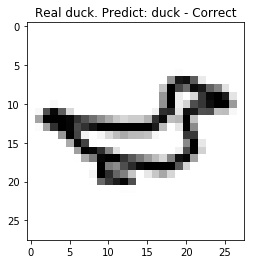

In [113]:
classTypeId = 0 #values between 0..10
imageNumber = 12 #value between 0..500
with tf.Session() as sess:
    # restore the model
    tf.train.Saver().restore(sess, savefile)

    myclass = sih.fileList[classTypeId]
    evalImage = (np.load('./SKETCH_data/{}.npy'.format(myclass))[500 + imageNumber] / 255)

    feed_dict = {x: np.reshape(evalImage,newshape=(1,784)), y_true: np.zeros((1, 10)), hold_prob : 0.5 }

    classification = sess.run(tf.argmax(y_pred,1), feed_dict)

    display(evalImage, myclass, sih.fileList[int(classification)])
        
        

In [47]:
 def predict(self, classTypeId, imageNumber):
    with self.tf.Session() as sess:
        # restore the model
        self.tf.train.Saver().restore(sess, self.savefile)

        myclass = self.sih.fileList[classTypeId]
        evalImage = (np.load('./SKETCH_data/{}.npy'.format(myclass))[500 + imageNumber] / 255)

        feed_dict = {x: np.reshape(evalImage,newshape=(1,784)), y_true: np.zeros((1, 10)), hold_prob : 0.5 }

        classification = sess.run(tf.argmax(y_pred,1), feed_dict)

        self.display(evalImage, myclass, sih.fileList[int(classification)])
    return classification

In [48]:
classTypeId = 0
imageNumber = 1
predict(classTypeId, imageNumber)

TypeError: predict() missing 1 required positional argument: 'imageNumber'

In [79]:
print(classification)

[7]


In [ ]:
sess.close()

## Great Job!